<h1 align="center">Анализ российского рынка отрасли "Строительство жилых и нежилых помещений"</h1> 

## 1. Немного об отрасли
______

Строительство жилых и нежилых объектов — один из крупнейших и наиболее инертных секторов экономики, отражающий уровень урбанизации, демографические и социальные изменения. Эта отрасль создает необходимую инфраструктуру для удовлетворения как жилищных, так и коммерческих потребностей общества.

Перспективы развития строительного сектора зависят от множества факторов: экономических, демографических, технологических и геополитических.

В рамках данного проекта проведена оценка экономической привлекательности строительной отрасли путем анализа показателей EBITDA и темпов роста чистой прибыли малых и средних предприятий. В результате исследования будет сформирован общий взгляд на состояние отрасли и даны ключевые выводы. Также будет проведен анализ географического распределения строительных компаний на территории РФ.

## 2. Сбор датасета
______

1) Соберем ИНН строительных компаний из `единого реестра субъектов малого и среднего предпринимательства ФНС`. С ресурса https://ofd.nalog.ru/ выгрузим нужные нам данные в формате .xlsx и отсортируем по виду деятельности(ОКВЭД 41.20) и категории(малые и средние предприятия)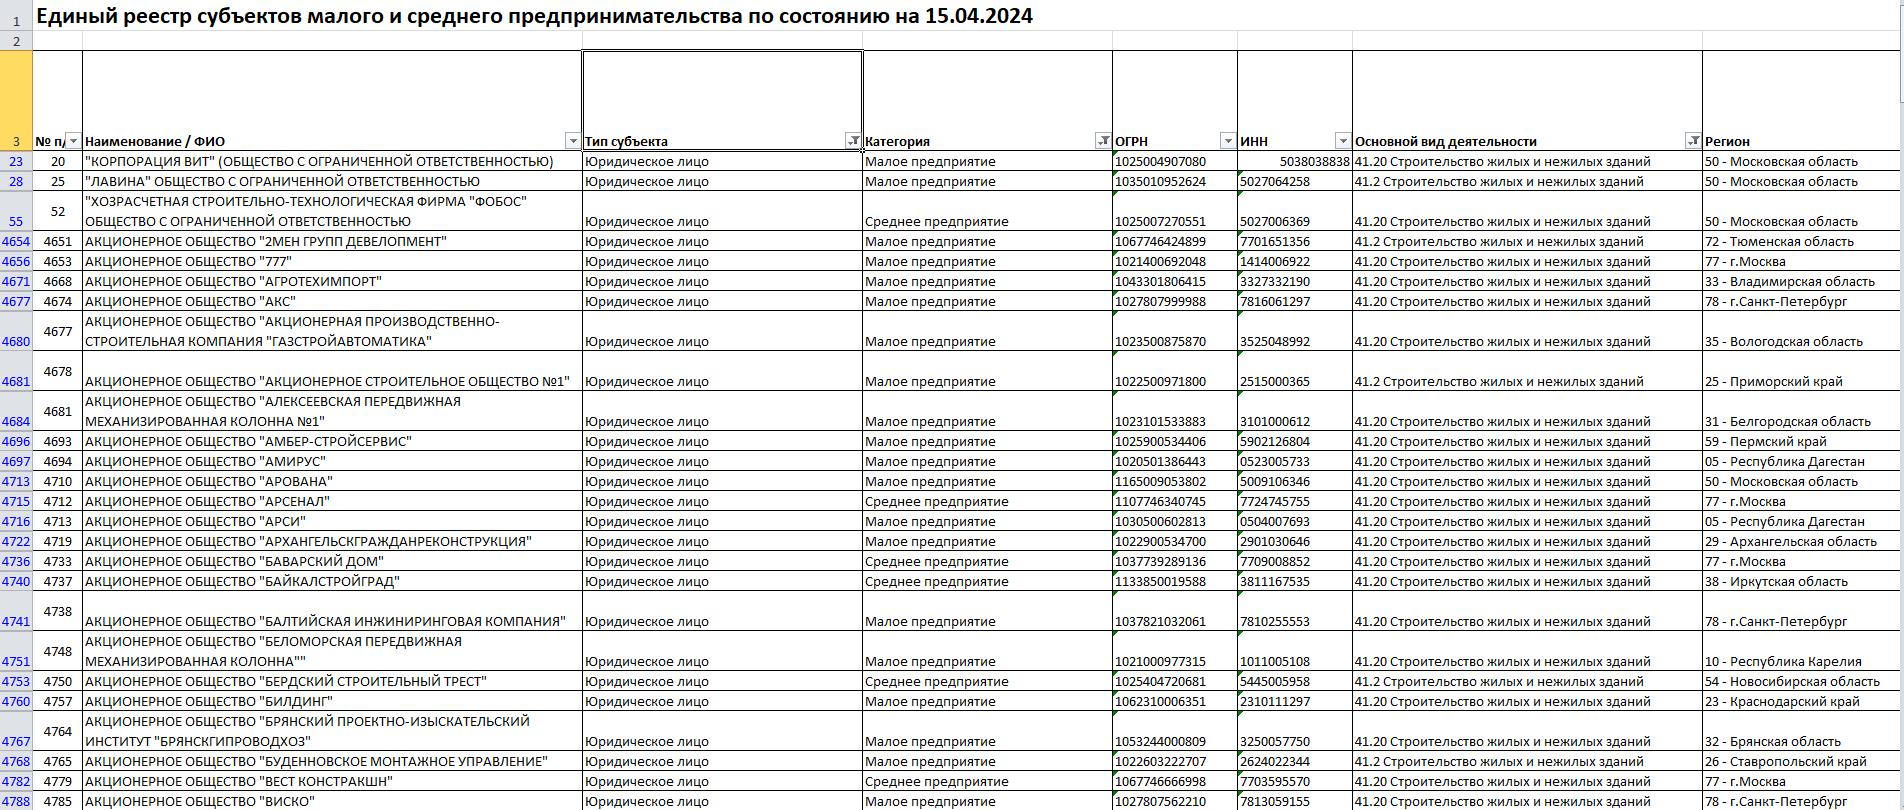

2) Для получения финансовых показателей компаний обратимся к ресурсу БФО (https://bo.nalog.ru/). Спарсим id компаний с помощью следующего запроса:
```python
    res = session.get(f"https://bo.nalog.ru/advanced-search/organizations/search?query={<ИНН компании>}&page=0").json()
    org_id = res["content"][0]["id"]
```

3) Далее будем взаимодейстовать со "спрятанным" API, используя запрос:
```python
    res = session.get(f"https://bo.nalog.ru/nbo/organizations/{<id компании>}/bfo/", headers=headers).json()
```
    Из полученного .json объекта достаем общую информацию о компании (название, адрес...), ее финансовые показатели за 2019-2023 года (при их наличии). После чего записываем эти данные в .csv файл для дальнейшей с ними работы.

4) Для анализа распределения компаний по регионам России нам нужно получить геоданные о компаниях, а именно их координаты широты и долготы. Для этого, к примеру, можно воспользоваться API геокодера от Яндекс. Так как ранее мы уже собрали адреса компаний, то пишем запрос:
```python
    params = {"apikey": "*******-****-****-****-************", "geocode": {<адрес компании>}, "lang": "ru_RU"}
    res = requests.get("https://geocode-maps.yandex.ru/1.x", params=params)
```
    Из полученного .xml объекта извлекаем широту и долготу и записываем их в отдельный .csv файл для удобства.

5) Осталось скачать карту России с размеченными регионами в формате .geojson для работы с geopandas. Это можно сделать, использовав данный ресурс https://simplemaps.com/gis/country/ru#all.

    Датасет готов! Перейдем к визуализации данных...

## 3. Визуализация и анализ
______

Импортируем функции для отрисовки графиков:

In [1]:
from graphs.revenue import revenue_map, revenue_pie_graph
from graphs.net_profit import growth_years_graph, net_profit_graph, net_profit_change_graph
from graphs.EBITDA import EBITDA_graph, av_med_EBITDA_graph

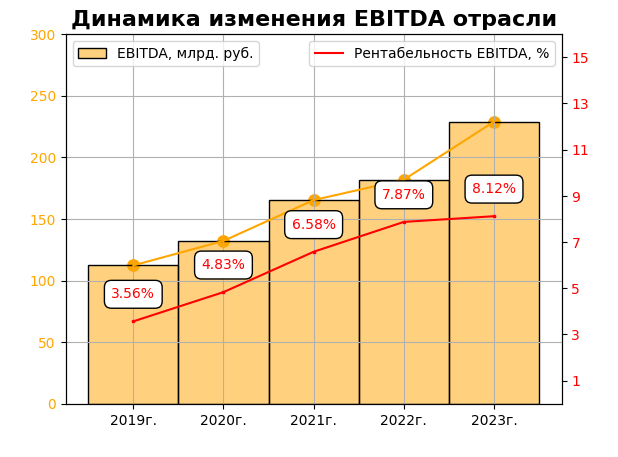

In [2]:
EBITDA_graph()

* Наблюдается устойчивый рост EBITDA за исследуемый период. За 5 лет показатель вырос со 112 млрд. рублей до 229 млрд. рублей
* Рентабельность EBITDA также показывает положительную тенденцию, что указывает на повышение операционной эффективности компаний в отрасли и может говорить об увеличении доли операционной прибыли.

Количество строительных компаний, отчетность которых содержала достаточно сведений для подсчета EBITDA, сильно разнится в зависимости от года. 

|    Год    | 2019г. | 2020г. | 2021г. | 2022г. | 2023г. |
|--------------|--------------|--------------|--------------|-------------|-------------|
| Количество компаний | 2071      | 2302       | 3065       | 3123      | 2976       |


В связи с этим более наглядным графиком послужит средняя и медианная EBITDA:

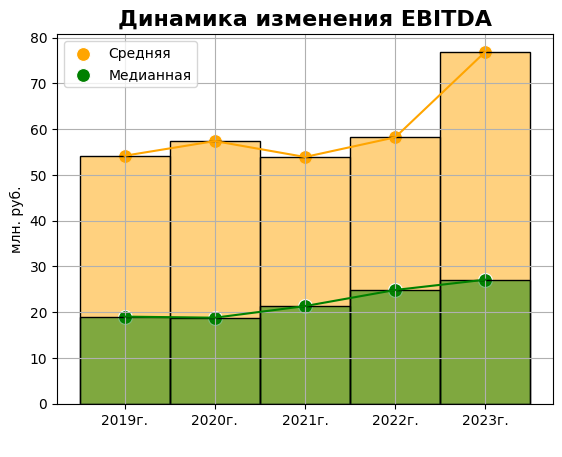

In [3]:
av_med_EBITDA_graph()

* Разрыв между средней и медианной EBITDA свидетельствует о том, что на рынке присутствуют крупные компании, финансовые показатели которых значительно выше остальных компаний на рынке.
* Средняя EBITDA обладала небольшой волатильностью с 2019г. до 2022г., а затем в 2023г. резко возросла до 77 млн руб
* Медианная EBITDA показывает положительную динамику, но её рост более плавный и менее резкий по сравнению со средней EBITDA. 

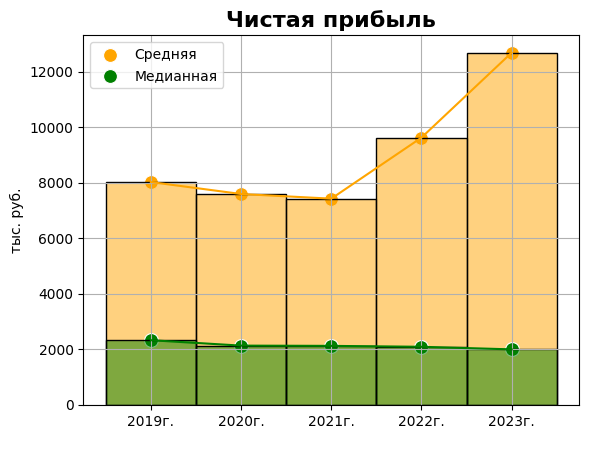

In [4]:
net_profit_graph()

* Наблюдается резкий рост чистой прибыли у крупных компаний последние 2 года
* Медианная чистая прибыль постепенно уменьшается, в то время как средняя, начиная с 2022г., резко ворастает, что говорит об увелечении диспропорции между крупными компаниями и остальными участниками рынка

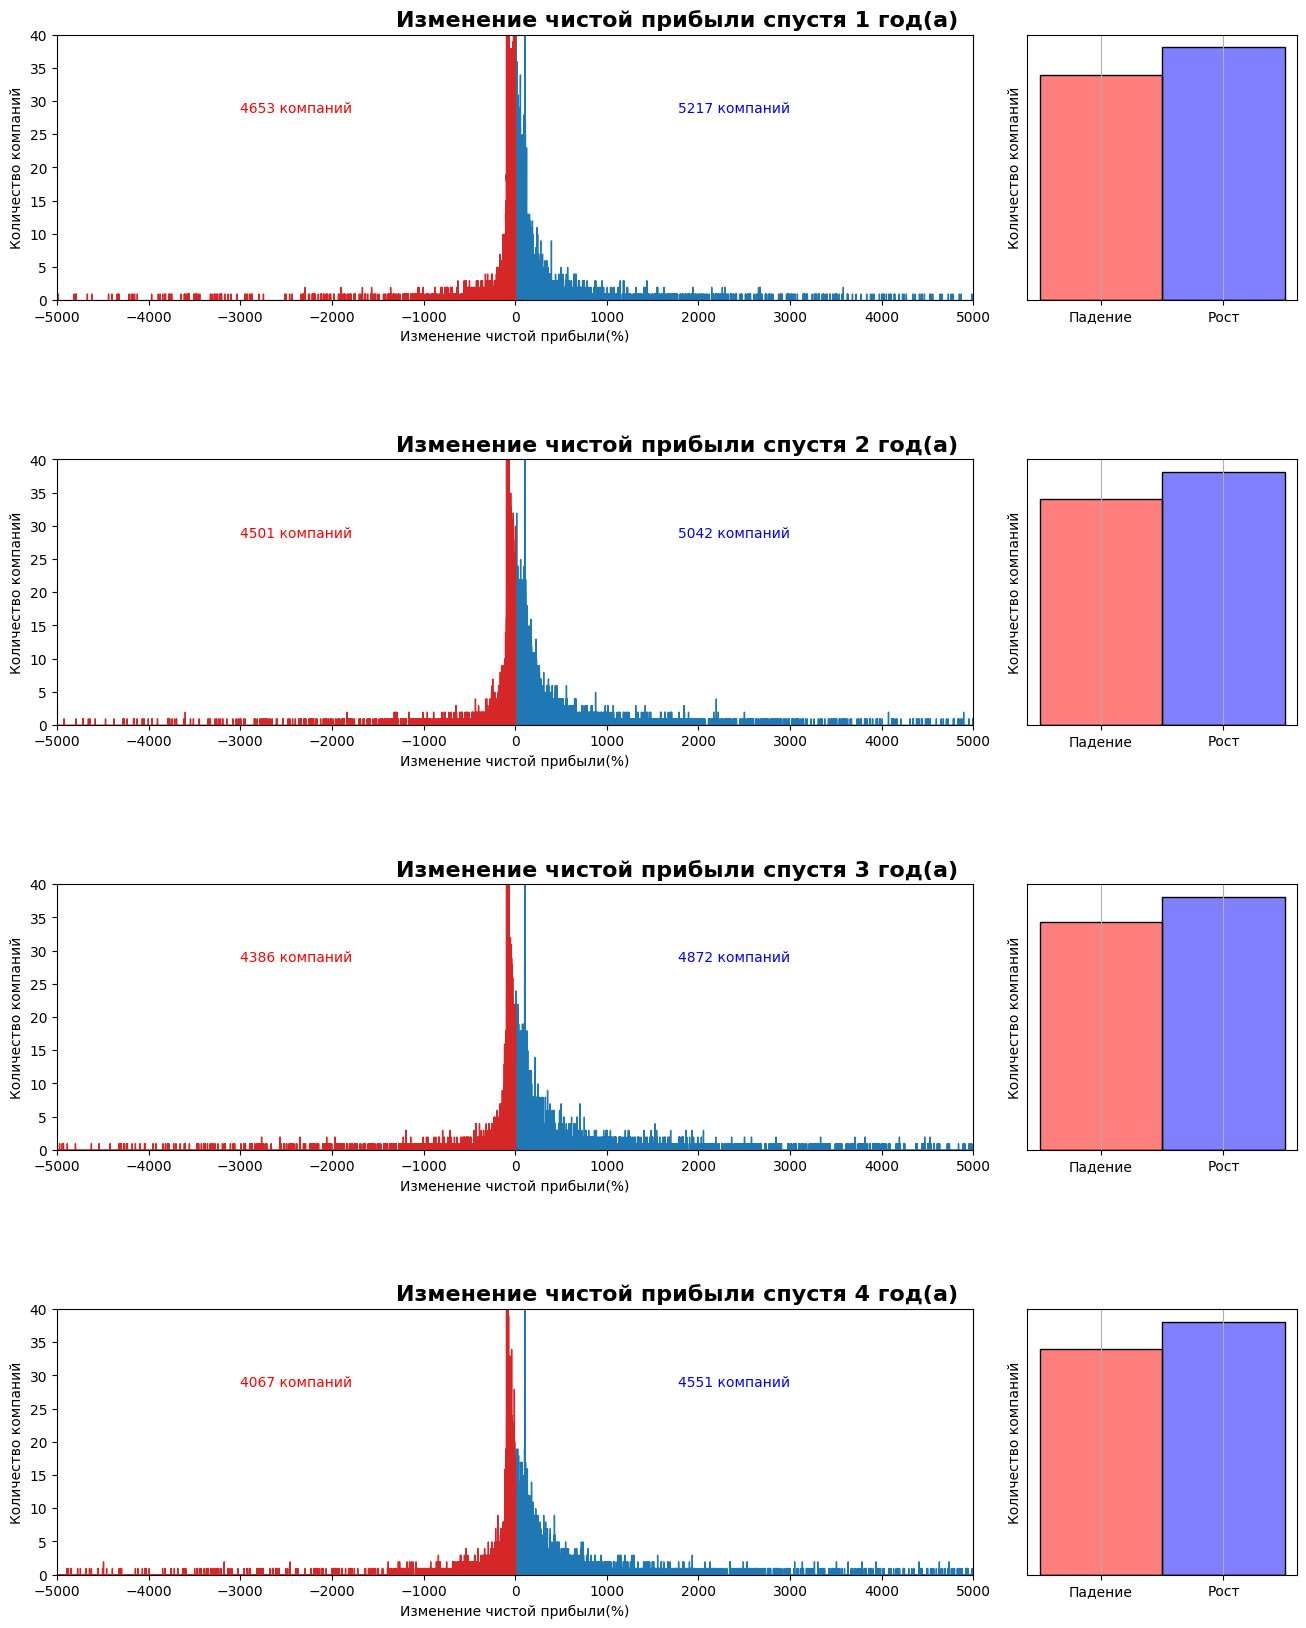

In [5]:
growth_years_graph()

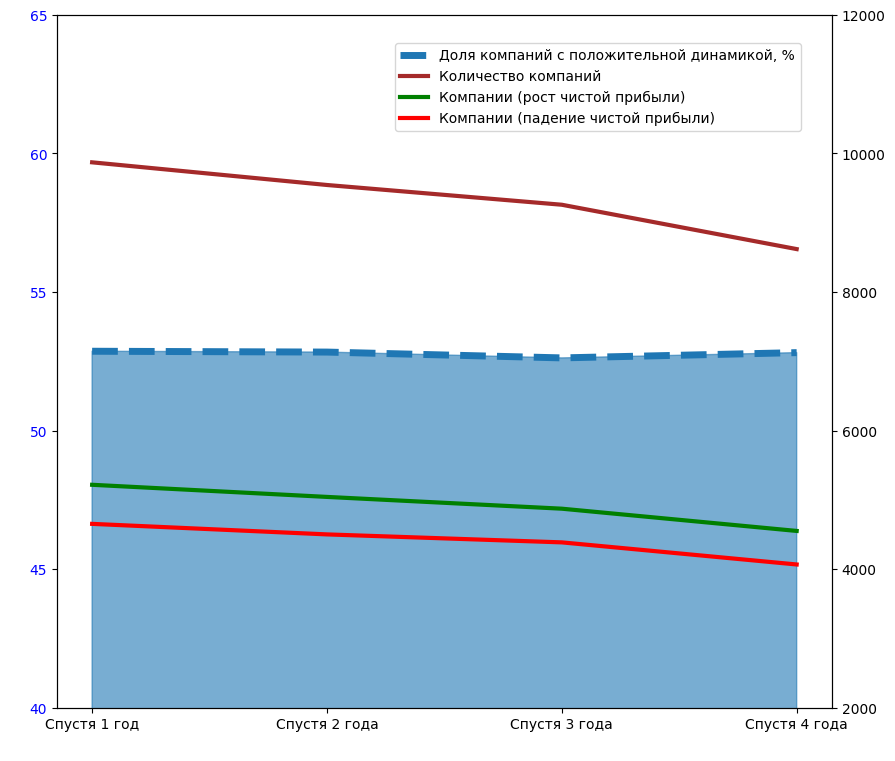

In [6]:
net_profit_change_graph()

_**Этот график отображает только те компании, по которым удалось собрать данные!** Учитываются предприятия, которые предоставляли информацию на ресурс БФО в течение 2, 3, 4 и 5 лет. Количество компаний с доступной отчетностью уменьшается со временем, так как часть из них недавно вышла на рынок_

* Чистая прибыль большинства компаний спустя года изменялась в диапазоне от -700% до 700%
* Преобладает количество компаний, у которых чистая прибыль выросла спустя года
* Отрасль демонстрирует стабильность, поскольку доля компаний с положительной динамикой остается на одинаковом уровне относительно общего числа компаний (53%)

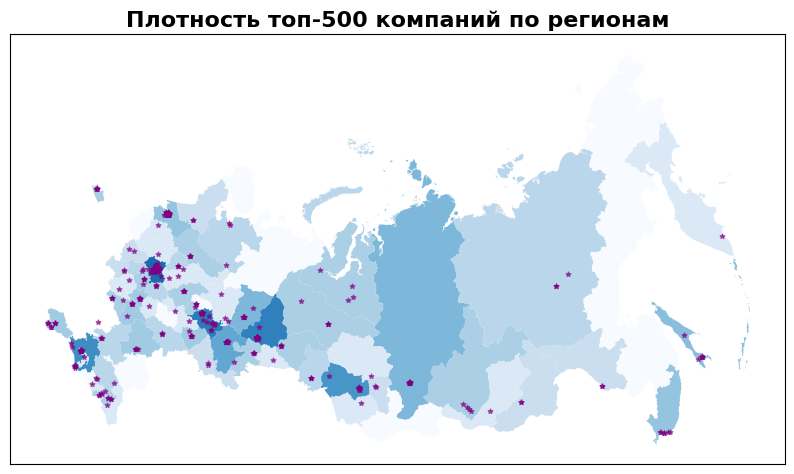

In [7]:
revenue_map()

* Компании с наибольшей выручкой преимущественно расположены в европейской части России
* Наибольшая концентрация наблюдается в Москве, Московской области и Санкт-Петербурге

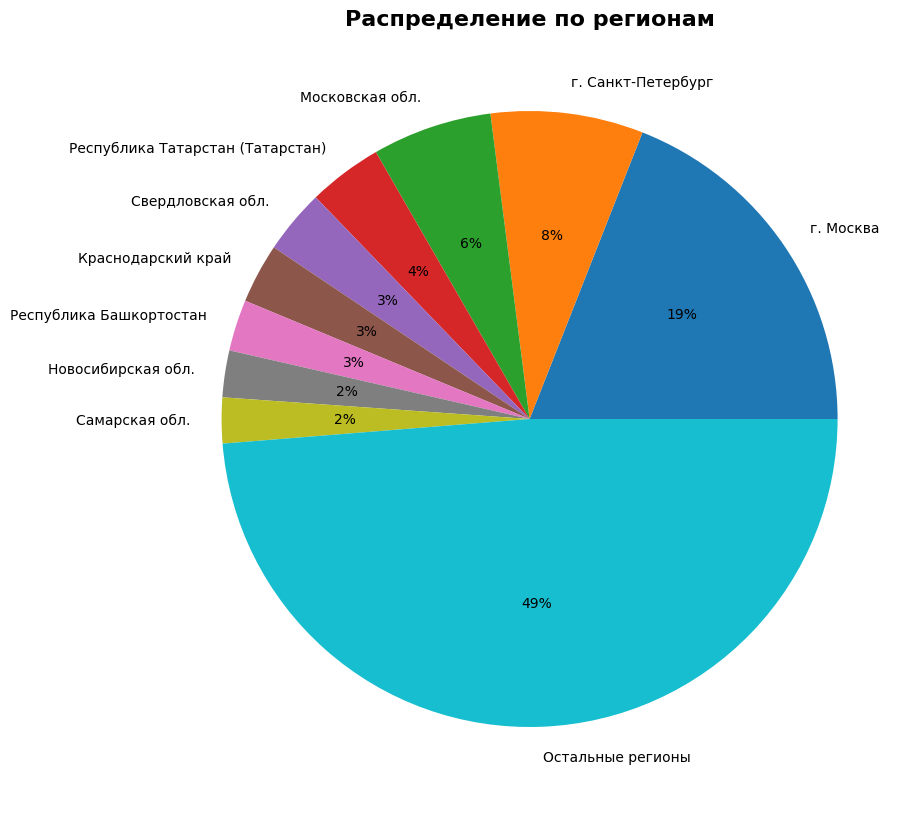

In [8]:
revenue_pie_graph()

 Количество компаний по регионам:
|    Регион    | Москва | Санкт-Петербург | Московская обл. | Татарстан | Свердловская область | Всего | 
|--------------|--------------|--------------|--------------|-------------|-------------|-------------|
| Количество компаний | 1992      | 838       | 658       | 408      | 354       | 10486       |

## 4. Выводы
______

С 2019 года наблюдается устойчивый рост EBITDA, что говорит о повышении операционной эффективности и перспективности вложений в отрасль. Однако стоит заметить, что на рынке присутствуют крупные доминирующие компании, финансовые показатели которых значительно выше, чем у остальных участников рынка. Это свидетельствует о концентрации капитала в руках ведущих игроков, что уменьшает возможности для небольших компаний.

Отрасль строительства жилых и нежилых помещений демонстрирует стабильный рост, при этом 53% компаний показывают положительную динамику роста чистой прибыли в течение последних лет

Исходя из того, что не все предприятия могут предоставить обязательную отчетность за период от 2-х и более лет, можно сделать вывод о том, что на рынок выходят новые компании.

Высокая концентрация строительных компаний в европейской части России указывает на региональные дисбалансы в развитии отрасли. Регионы с наибольшей концентрацией, такие как Москва и Санкт-Петербург, продолжают привлекать большую часть капитала.

В более долгосрочной перспективе возможна консолидация строительного рынка: слабые и нестабильные малые компании могут либо покинуть рынок, либо быть поглощены крупными игроками.